In [2]:
## LOAD DATA. 
prompt_only_file = "/home/oanh/uncertainty/VL-Uncertainty/exp_decompose/log_id202502051010_prompt_only_temp_0.5.json"
language_only_file = "/home/oanh/uncertainty/VL-Uncertainty/exp_decompose/log_id202502051025_language_only_temp_0.5.json"
language_support_file = "/home/oanh/uncertainty/VL-Uncertainty/exp_decompose/log_id202502051042_language_support_temp_0.5.json"
image_language_file = "/home/oanh/uncertainty/VL-Uncertainty/exp_decompose/log_id202502051100_original_temp_0.5.json"

In [3]:
import json
with open(prompt_only_file, 'r', encoding='utf-8') as f:
    prompt_only = json.load(f)
# print(prompt_only)
with open(language_only_file, 'r', encoding='utf-8') as f:
    language_only = json.load(f)
# print(language_only)
with open(language_support_file, 'r', encoding='utf-8') as f1:
    language_support = json.load(f1)
# print(language_support)
with open(image_language_file, 'r', encoding='utf-8') as f2:
    image_language = json.load(f2)
# print(image_language)

In [4]:
print(len(image_language))
print(len(language_only))

192
223


[[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1], [0, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1], [1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1], [1, 1, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1], [1, 1, 0, 0, 1, 0], [1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1], [0, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1], [1, 1, 0, 1, 1, 1], [1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 1, 1], [0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 0, 1], [1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1],

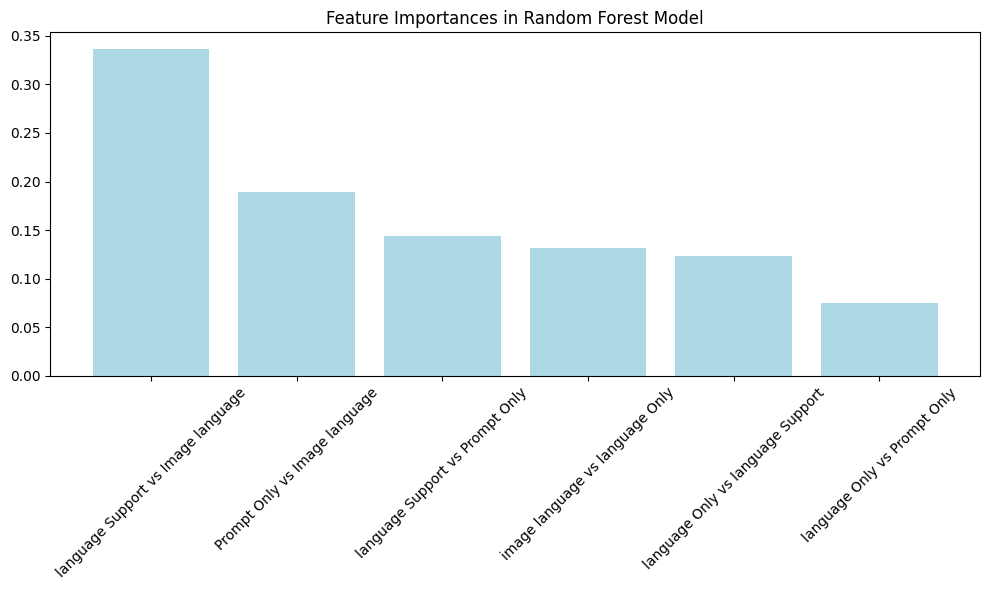

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Prepare the data
data = []
labels = []

# for i in range(len(language_only)-30):
for i in range(len(language_only) - 35):
    prompt_only_answer = prompt_only[str(i)]['ans'].lower()
    language_only_answer = language_only[str(i)]['ans'].lower()
    language_support_answer = language_support[str(i)]['ans'].lower()
    image_language_answer = image_language[str(i)]['ans'].lower()
    image_language_correct = image_language[str(i)]['flag_ans_correct']
    
    # Check if there are differences between answers
    language_only_language_support = 1 if language_only_answer != language_support_answer else 0
    language_only_prompt_only = 1 if language_only_answer != prompt_only_answer else 0
    language_support_image_language = 1 if language_support_answer != image_language_answer else 0
    language_support_prompt_only = 1 if language_support_answer != prompt_only_answer else 0
    image_language_language_only = 1 if image_language_answer != language_only_answer else 0
    prompt_only_image_language = 1 if prompt_only_answer != image_language_answer else 0
    low_uncertainty = 1 if image_language[str(i)]['uncertainty'] <= 'low' else 0
    # data.append([language_only_val, language_support_val, image_language_val])
    data.append([
        language_only_language_support, language_only_prompt_only, language_support_image_language,
        language_support_prompt_only, image_language_language_only, prompt_only_image_language])
    labels.append(0 if image_language_correct else 1)  # 0 for correct, 1 for wrong

print(data)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
print(f"Test set size: {len(y_test)}")

# Create and train the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate feature importance
feature_names = ['language Only vs language Support', 
                'language Only vs Prompt Only',
                'language Support vs Image language',
                'language Support vs Prompt Only',
                'image language vs language Only',
                'Prompt Only vs Image language',
                'low uncertainty'
                ]

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature rankings
print("\nFeature Rankings:")
for f in range(len(feature_names)):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest Model")
plt.bar(range(len(feature_names)), importances[indices],
        color="lightblue", align="center")
plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

# # Example usage function with probability scores
# def predict_image_language_correctness(language_only_answer, language_support_answer, image_language_answer):
#     language_only_val = 1 if language_only_answer != language_support_answer else 0
#     language_support_val = 1 if language_support_answer != image_language_answer else 0
#     image_language_val = 1 if image_language_answer != language_only_answer else 0
    
#     # Get both prediction and probability
#     prediction = clf.predict([[language_only_val, language_support_val, image_language_val]])
#     prob = clf.predict_proba([[language_only_val, language_support_val, image_language_val]])
    
#     result = 'Correct' if prediction[0] == 0 else 'Wrong'
#     confidence = prob[0][0] if prediction[0] == 0 else prob[0][1]
    
#     return {
#         'prediction': result,
#         'confidence': f'{confidence:.2%}',
#         'feature_values': {
#             'language Only vs language Support': language_only_val,
#             'language Support vs Image language': language_support_val,
#             'Image language vs language Only': image_language_val
#         }
#     }
    # Plot one of the decision trees in the RandomForestClassifier

# Test the enhanced function
# print(predict_image_language_correctness('1 or -5', '1 or -5', '1 or -5'))

In [6]:
import pandas as pd
df = pd.DataFrame(data, columns=feature_names)
df['label'] = labels
print(df)
df.head(5)

     language Only vs language Support  language Only vs Prompt Only  \
0                                    1                             1   
1                                    1                             1   
2                                    1                             1   
3                                    0                             1   
4                                    1                             1   
..                                 ...                           ...   
183                                  1                             1   
184                                  1                             1   
185                                  1                             1   
186                                  1                             1   
187                                  1                             1   

     language Support vs Image language  language Support vs Prompt Only  \
0                                     1                    

,language Only vs language Support,language Only vs Prompt Only,language Support vs Image language,language Support vs Prompt Only,image language vs language Only,Prompt Only vs Image language,label
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1
3,0,1,1,1,1,1,1
4,1,1,0,1,1,1,1


In [7]:
# !pip install openpyxl

In [8]:
df.to_excel('data.xlsx', index=True)

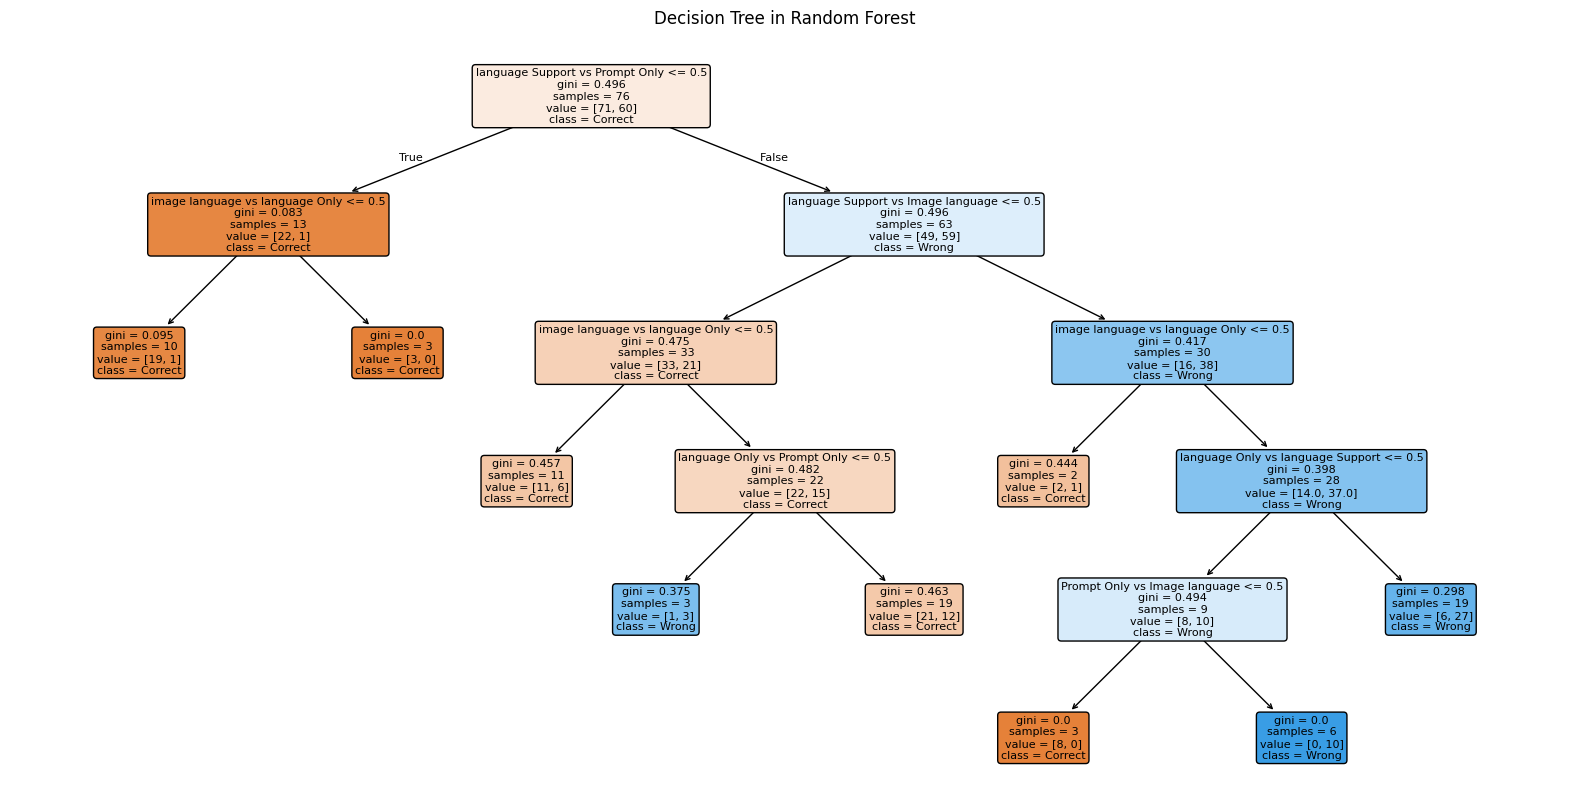

In [30]:
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[2], feature_names=feature_names, class_names=['Correct', 'Wrong'], filled=True, rounded=True)
plt.title("Decision Tree in Random Forest")
plt.show()